In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Discovery

### Do we have enough data to draft an analytic plan?

In [5]:
#raw_iris_data = pd.read_csv('raw_iris_dataset.csv')
url = "https://raw.githubusercontent.com/naronald/SwinDataSciDemo/main/raw_iris_dataset.csv"
raw_iris_data = pd.read_csv(url)
raw_iris_data

,sepal length (cm),sepal width (cm),petal length (mm),petal width (mm),species,date measured,measured by
0,5.1,3.5,NaN,2.0,setosa,2023/5/10,Joe
1,4.9,3.0,14.0,2.0,setosa,2023/5/16,Alan
2,4.7,3.2,13.0,2.0,setosa,2023/5/23,Joe
3,4.6,3.1,15.0,2.0,setosa,2023/5/14,Alisa
4,5.0,3.6,14.0,2.0,setosa,2023/6/16,Joe
...,...,...,...,...,...,...,...
205,6.4,2.8,53.0,19.0,virginica,2023/5/20,Joe
206,6.0,2.9,51.0,19.0,virginica,2023/5/10,Zack
207,5.2,2.6,45.0,18.0,virginica,2023/6/23,Alan
208,6.4,NaN,54.0,20.0,virginica,2023/5/22,Alan


In [3]:
# briefly explore the data
print(raw_iris_data['species'].unique())

['setosa' 'versicolor' 'virginica']


In [4]:
# briefly explore the data (by species)
raw_setosa = raw_iris_data[raw_iris_data['species']=='setosa']
print('setosa:')
print(f'sepal length (cm): {raw_setosa["sepal length (cm)"].min()} ~ {raw_setosa["sepal length (cm)"].max()}')
print(f'sepal width (cm): {raw_setosa["sepal width (cm)"].min()} ~ {raw_setosa["sepal width (cm)"].max()}')
print(f'petal length (mm): {raw_setosa["petal length (mm)"].min()} ~ {raw_setosa["petal length (mm)"].max()}')
print(f'petal width (mm): {raw_setosa["petal width (mm)"].min()} ~ {raw_setosa["petal width (mm)"].max()}')
raw_versicolor = raw_iris_data[raw_iris_data['species']=='versicolor']
print('versicolor:')
print(f'sepal length (cm): {raw_versicolor["sepal length (cm)"].min()} ~ {raw_versicolor["sepal length (cm)"].max()}')
print(f'sepal width (cm): {raw_versicolor["sepal width (cm)"].min()} ~ {raw_versicolor["sepal width (cm)"].max()}')
print(f'petal length (mm): {raw_versicolor["petal length (mm)"].min()} ~ {raw_versicolor["petal length (mm)"].max()}')
print(f'petal width (mm): {raw_versicolor["petal width (mm)"].min()} ~ {raw_versicolor["petal width (mm)"].max()}')
raw_virginica = raw_iris_data[raw_iris_data['species']=='virginica']
print('virginica:')
print(f'sepal length (cm): {raw_virginica["sepal length (cm)"].min()} ~ {raw_virginica["sepal length (cm)"].max()}')
print(f'sepal width (cm): {raw_virginica["sepal width (cm)"].min()} ~ {raw_virginica["sepal width (cm)"].max()}')
print(f'petal length (mm): {raw_virginica["petal length (mm)"].min()} ~ {raw_virginica["petal length (mm)"].max()}')
print(f'petal width (mm): {raw_virginica["petal width (mm)"].min()} ~ {raw_virginica["petal width (mm)"].max()}')

setosa:
sepal length (cm): 4.3 ~ 6.0
sepal width (cm): 2.3 ~ 4.4
petal length (mm): 10.0 ~ 19.0
petal width (mm): 1.0 ~ 6.0
versicolor:
sepal length (cm): 4.8 ~ 7.1
sepal width (cm): 2.0 ~ 3.4
petal length (mm): 30.0 ~ 51.0
petal width (mm): 10.0 ~ 18.0
virginica:
sepal length (cm): 4.9 ~ 7.9
sepal width (cm): 2.2 ~ 3.8
petal length (mm): 44.0 ~ 69.0
petal width (mm): 14.0 ~ 25.0


In [5]:
# briefly explore the data (by species): visualization
raw_setosa_data = raw_iris_data[raw_iris_data['species']=='setosa']
raw_versicolor_data = raw_iris_data[raw_iris_data['species']=='versicolor']
raw_virginica_data = raw_iris_data[raw_iris_data['species']=='virginica']

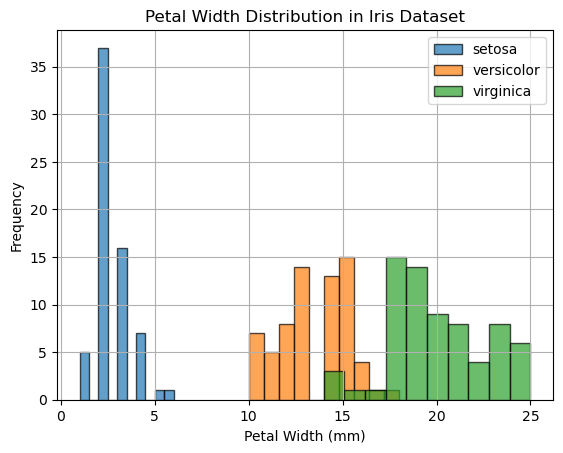

In [6]:
plt.hist(raw_setosa_data['petal width (mm)'], bins=10, alpha=0.7, edgecolor='black', label='setosa')
plt.hist(raw_versicolor_data['petal width (mm)'], bins=10, alpha=0.7, edgecolor='black', label='versicolor')
plt.hist(raw_virginica_data['petal width (mm)'], bins=10, alpha=0.7, edgecolor='black', label='virginica')
plt.title('Petal Width Distribution in Iris Dataset')
plt.xlabel('Petal Width (mm)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()

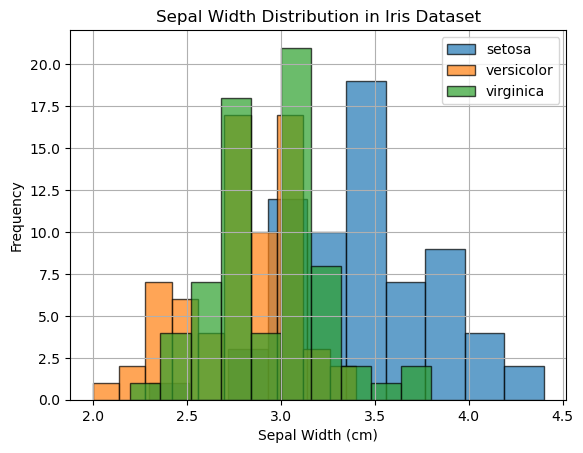

In [7]:
plt.hist(raw_setosa_data['sepal width (cm)'], bins=10, alpha=0.7, edgecolor='black', label='setosa')
plt.hist(raw_versicolor_data['sepal width (cm)'], bins=10, alpha=0.7, edgecolor='black', label='versicolor')
plt.hist(raw_virginica_data['sepal width (cm)'], bins=10, alpha=0.7, edgecolor='black', label='virginica')
plt.title('Sepal Width Distribution in Iris Dataset')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid()
plt.legend()

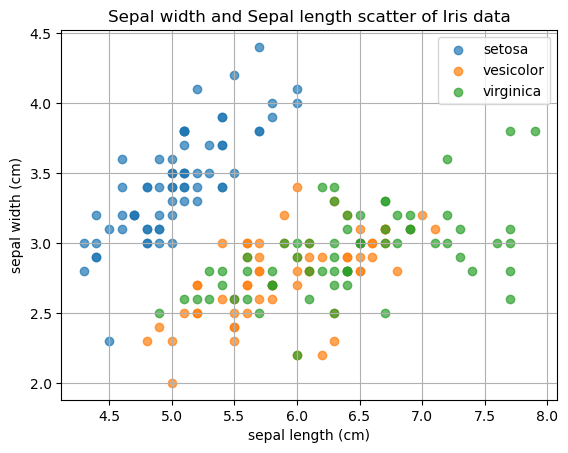

In [8]:
plt.scatter(raw_setosa_data['sepal length (cm)'], raw_setosa_data['sepal width (cm)'], label='setosa', alpha=0.7)
plt.scatter(raw_versicolor_data['sepal length (cm)'], raw_versicolor_data['sepal width (cm)'], label='vesicolor', alpha=0.7)
plt.scatter(raw_virginica_data['sepal length (cm)'], raw_virginica_data['sepal width (cm)'], label='virginica', alpha=0.7)
plt.title('Sepal width and Sepal length scatter of Iris data')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid()
plt.legend()

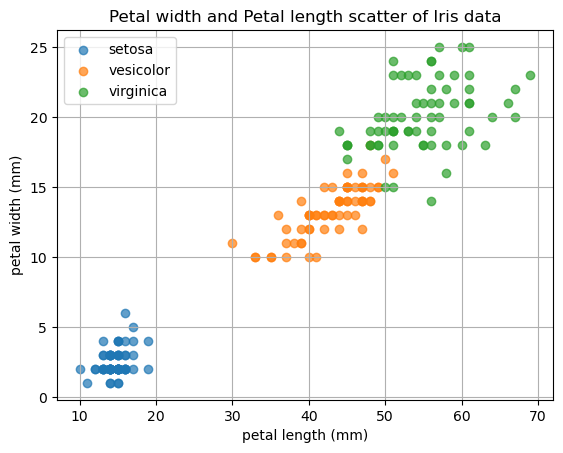

In [9]:
plt.scatter(raw_setosa_data['petal length (mm)'], raw_setosa_data['petal width (mm)'], label='setosa', alpha=0.7)
plt.scatter(raw_versicolor_data['petal length (mm)'], raw_versicolor_data['petal width (mm)'], label='vesicolor', alpha=0.7)
plt.scatter(raw_virginica_data['petal length (mm)'], raw_virginica_data['petal width (mm)'], label='virginica', alpha=0.7)
plt.title('Petal width and Petal length scatter of Iris data')
plt.xlabel('petal length (mm)')
plt.ylabel('petal width (mm)')
plt.grid()
plt.legend()

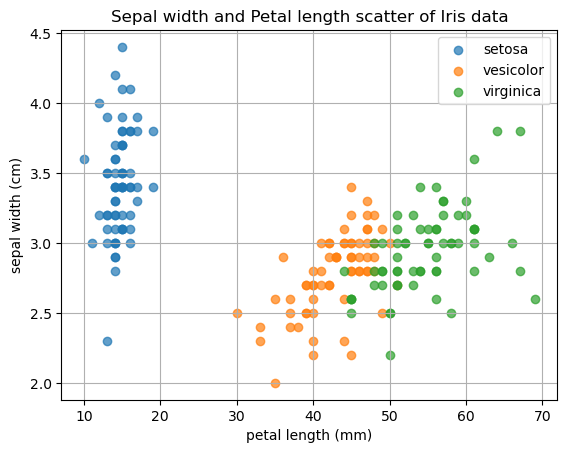

In [10]:
plt.scatter(raw_setosa_data['petal length (mm)'], raw_setosa_data['sepal width (cm)'], label='setosa', alpha=0.7)
plt.scatter(raw_versicolor_data['petal length (mm)'], raw_versicolor_data['sepal width (cm)'], label='vesicolor', alpha=0.7)
plt.scatter(raw_virginica_data['petal length (mm)'], raw_virginica_data['sepal width (cm)'], label='virginica', alpha=0.7)
plt.title('Sepal width and Petal length scatter of Iris data')
plt.xlabel('petal length (mm)')
plt.ylabel('sepal width (cm)')
plt.grid()
plt.legend()

# Data Prep

### Do I have enough good data to start building the model?
### Is my data fit for use?

In [11]:
# look at the raw data again
raw_iris_data

,sepal length (cm),sepal width (cm),petal length (mm),petal width (mm),species,date measured,measured by
0,5.1,3.5,NaN,2.0,setosa,2023/5/10,Joe
1,4.9,3.0,14.0,2.0,setosa,2023/5/16,Alan
2,4.7,3.2,13.0,2.0,setosa,2023/5/23,Joe
3,4.6,3.1,15.0,2.0,setosa,2023/5/14,Alisa
4,5.0,3.6,14.0,2.0,setosa,2023/6/16,Joe
...,...,...,...,...,...,...,...
205,6.4,2.8,53.0,19.0,virginica,2023/5/20,Joe
206,6.0,2.9,51.0,19.0,virginica,2023/5/10,Zack
207,5.2,2.6,45.0,18.0,virginica,2023/6/23,Alan
208,6.4,NaN,54.0,20.0,virginica,2023/5/22,Alan


In [12]:
# select data
iris_data = raw_iris_data.drop(['date measured', 'measured by'], axis=1)
iris_data

,sepal length (cm),sepal width (cm),petal length (mm),petal width (mm),species
0,5.1,3.5,NaN,2.0,setosa
1,4.9,3.0,14.0,2.0,setosa
2,4.7,3.2,13.0,2.0,setosa
3,4.6,3.1,15.0,2.0,setosa
4,5.0,3.6,14.0,2.0,setosa
...,...,...,...,...,...
205,6.4,2.8,53.0,19.0,virginica
206,6.0,2.9,51.0,19.0,virginica
207,5.2,2.6,45.0,18.0,virginica
208,6.4,NaN,54.0,20.0,virginica


In [13]:
# check usability and clean the data
# some data may be abnormal, containing errors or missing values
# in this case, we have some missing values

# check if any cell in a column contains 'nan'(no value)
iris_data.isna().any()

sepal length (cm)     True
sepal width (cm)      True
petal length (mm)     True
petal width (mm)      True
species              False
dtype: bool

In [14]:
# check again to see if 'nan' are removed
iris_data_drop_na = iris_data.dropna()
iris_data_drop_na

,sepal length (cm),sepal width (cm),petal length (mm),petal width (mm),species
1,4.9,3.0,14.0,2.0,setosa
2,4.7,3.2,13.0,2.0,setosa
3,4.6,3.1,15.0,2.0,setosa
4,5.0,3.6,14.0,2.0,setosa
5,5.4,3.9,17.0,4.0,setosa
...,...,...,...,...,...
203,6.4,2.8,54.0,19.0,virginica
205,6.4,2.8,53.0,19.0,virginica
206,6.0,2.9,51.0,19.0,virginica
207,5.2,2.6,45.0,18.0,virginica


In [15]:
iris_data_drop_na.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (mm)    False
petal width (mm)     False
species              False
dtype: bool

In [16]:
# align the unit of data to a uniform unit
petal_length_cm = np.array(iris_data_drop_na['petal length (mm)'])/10
petal_width_cm = np.array(iris_data_drop_na['petal width (mm)'])/10
iris_data_normalized = pd.DataFrame(iris_data_drop_na)
iris_data_normalized['petal length (cm)'] = petal_length_cm
iris_data_normalized['petal width (cm)'] = petal_width_cm
iris_data_normalized=iris_data_normalized.drop(['petal length (mm)','petal width (mm)'], axis=1)
iris_data_normalized

,sepal length (cm),sepal width (cm),species,petal length (cm),petal width (cm)
1,4.9,3.0,setosa,1.4,0.2
2,4.7,3.2,setosa,1.3,0.2
3,4.6,3.1,setosa,1.5,0.2
4,5.0,3.6,setosa,1.4,0.2
5,5.4,3.9,setosa,1.7,0.4
...,...,...,...,...,...
203,6.4,2.8,virginica,5.4,1.9
205,6.4,2.8,virginica,5.3,1.9
206,6.0,2.9,virginica,5.1,1.9
207,5.2,2.6,virginica,4.5,1.8


In [17]:
# transform string to number because models can only work on numbers
iris_data_ready = pd.DataFrame(iris_data_normalized)
specie_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
specie_num = np.array([specie_mapping[specie] for specie in iris_data_normalized['species']])
iris_data_ready['species_num'] = specie_num
iris_data_ready

,sepal length (cm),sepal width (cm),species,petal length (cm),petal width (cm),species_num
1,4.9,3.0,setosa,1.4,0.2,0
2,4.7,3.2,setosa,1.3,0.2,0
3,4.6,3.1,setosa,1.5,0.2,0
4,5.0,3.6,setosa,1.4,0.2,0
5,5.4,3.9,setosa,1.7,0.4,0
...,...,...,...,...,...,...
203,6.4,2.8,virginica,5.4,1.9,2
205,6.4,2.8,virginica,5.3,1.9,2
206,6.0,2.9,virginica,5.1,1.9,2
207,5.2,2.6,virginica,4.5,1.8,2


In [18]:
# shuffle and split the dataset to a training set and a test set
# we need a training set to train the model
# and a test set to test the performance


from sklearn.model_selection import train_test_split
# sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
selected_features = ['petal length (cm)', 'petal width (cm)']
all_selected_features = iris_data_ready[selected_features]
all_species_num = iris_data_ready['species_num']
features_train, features_test, species_train, species_test =\
train_test_split(all_selected_features, all_species_num, test_size=0.33, random_state=0)

In [19]:
print('training set')
features_train

training set


,petal length (cm),petal width (cm)
23,1.7,0.5
185,5.2,2.3
97,5.0,1.7
149,6.1,2.5
146,4.5,1.7
...,...,...
110,4.4,1.2
74,4.6,1.5
127,4.7,1.5
48,1.5,0.2


In [20]:
print('test set')
features_test

test set


,petal length (cm),petal width (cm)
114,4.2,1.3
46,1.6,0.2
174,5.6,1.4
70,4.7,1.4
137,4.5,1.4
...,...,...
53,1.4,0.2
119,4.1,1.3
144,5.8,2.2
41,1.3,0.3


# Model Planning

### Do I have a good idea about the type of model  to try?

### There are three main categories of models,
### Classification model: 
            
Categorizing data into different classes or groups based on input features. It predicts the probability of each class, and then selects the class with the highest probability as the final prediction.
#### example case:
Predicting whether an email is spam or not based on its content and metadata.

### Regression model: 
Predicting continuous numerical values. It learns the relationship between input features and the target variable by fitting a mathematical line or curve to the data points.
#### example case:
Predicting the house prices based on features like area, number of bedrooms, and location.

### Clustering model:
Grouping similar data points together based on their similarities. It doesn't require labeled examples and works on unsupervised learning.
#### example case:
Grouping customers into different segments based on their shopping behavior to personalize marketing strategies.
    

# Model Building

In [21]:
# fit the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(features_train, species_train)

In [22]:
# test the model with the test set
species_pred = clf.predict(features_test)
# print the predicted result and the real species
print(species_pred)
print(species_test.to_list())

[1 0 2 1 1 2 0 1 2 0 0 1 2 1 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 0 0 1 2 0 0 0 2
 2 1 0 2 1 2 2 1 0 0 1 0 1 2 0 2 2 0 2 0 0 1 2 0 1]
[1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1]


In [23]:
# compare the predicted result and the real species
# True indicates prediction is correct, False indicates incorrect
print((species_pred==species_test).to_list())

[True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


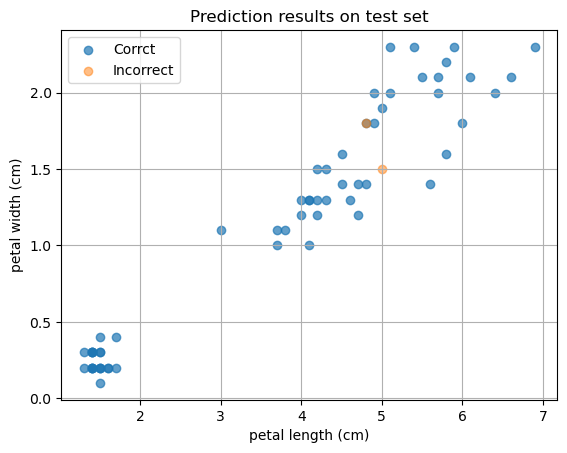

In [24]:
# plot the prediction result with the feature we used to visually examine the result
# This makes it eaiser to identify which data points were correctly classified and which are not

pred_correct = features_test[species_pred==species_test]
pred_incorrect = features_test[species_pred!=species_test]

plt.scatter(x=pred_correct[selected_features[0]], y=pred_correct[selected_features[1]], label='Corrct', alpha=0.7)
plt.scatter(x=pred_incorrect[selected_features[0]], y=pred_incorrect[selected_features[1]], label='Incorrect', alpha=0.5)
plt.title('Prediction results on test set')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.grid()
plt.legend()

In [25]:
# print the test set to see which data points are correctly classified and which are not

#pred_correct = features_test[species_pred==species_test]
#pred_incorrect = features_test[species_pred!=species_test]
#
#plt.scatter(x=features_test[selected_features[0]][species_test==0], y=features_test[selected_features[1]][species_test==0], label='setosa', alpha=0.7)
#plt.scatter(x=features_test[selected_features[0]][species_test==1], y=features_test[selected_features[1]][species_test==1], label='versicolor', alpha=0.7)
#plt.scatter(x=features_test[selected_features[0]][species_test==2], y=features_test[selected_features[1]][species_test==2], label='virginica', alpha=0.3)
#plt.title('Petal width and Petal length scatter of Iris data(test set)')
#plt.xlabel(selected_features[0])
#plt.ylabel(selected_features[1])
#plt.grid()
#plt.legend()

In [26]:
num_correct=len(pred_correct)
num_pred = len(pred_correct) + len(pred_incorrect)
print(f'accuracy: {(num_correct/num_pred)*100}%')

accuracy: 96.7741935483871%


In [27]:
print(f'misclassified records: {species_pred[species_pred!=species_test]}')
print(f'real labels: {species_test[species_pred!=species_test].tolist()}')

misclassified records: [2 1]
real labels: [1, 2]


In [28]:
# 0:'setosa', 1:'versicolor', 2:'virginica'
print(f'1 out of {len(species_test[species_test==1])} versicolor is misclassified, \
{1/len(species_test[species_test==1])*100}% chance to be misclassified.' )
print(f'1 out of {len(species_test[species_test==2])} virginica is misclassified, \
{1/len(species_test[species_test==2])*100}% chance to be misclassified.')

1 out of 21 versicolor is misclassified, 4.761904761904762% chance to be misclassified.
1 out of 20 virginica is misclassified, 5.0% chance to be misclassified.


### Is our model robust? [Advanced]
    
Any chance that we are just lucky to get the high accuracy?
Do we need to tune the hyper-parameters?
Maybe the training set is just too good and the test set is too easy to predict?
Let's try different subset of data and hyper-parameters to build a more robust model.

In [29]:
# kfold and GridSearchCv split the training set and test different sets of hyper-parameters
# this helps us to find the hyper-parameters that have the vest performance in different split of data
# and build a more robust model


from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

# define the hyper-parameters we want to try
param_grid = {'C': [0.1, 1, 10]}

# use the kfold to randomly split the training set
kfold = KFold(n_splits=4, shuffle=True, random_state=30)


# use the grid search to find the best hyper-parameter setting
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_search.fit(features_train, species_train)

# print the best found hyper-parameters and its score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10}
Best Score: 0.9679939516129032


# Communicate

### What do you find about the data or the model?

### What can we tell Alan?
    
For management, they might care more about the accuracy.
ex: The overall accuracy is 96%. The model can accurately distinguish the setosa from the other two species, but may misclassify the versicolor and the virginica with probability around 4%~5%.

### What can we tell the engineer responsible for building the robot?
    
For engineers, they might need to know how the model work and how to make it better.
ex: The model is trained with the petal length and the petal width and some versicolor and virginica have similar petal length and width. Some features that are more distinctive can be considered to avoid misclassification.